##### Created on 04/28/2022

##### This notebook is to get the GCM wind vs M relationship for the oceans over 30N to 70N. Will be compared with MERRA2+MAC and PPE outputs.

##### Updating to retrieve PPE daily data and CESM2 daily data and MERRA2 winds


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
import calendar
from global_land_mask import globe
import glob
import math
from scipy import stats
import os
import netCDF4 as nc

from highres_read import read_var_hires
from myReadGCMsDaily import read_var_mod
from regrid_wght_3d import regrid_wght_wnans

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
plt.clf()
plt.rcParams['figure.figsize'] = (10, 10)

<Figure size 600x400 with 0 Axes>

In [3]:
from con_models import get_cons
con, use_colors, varname, pvarname, modname, warming_modname, hiresmd, amip_md = get_cons()

In [4]:
#latitude range
latr1 = 30
latr2 = 80


In [5]:
time1=[2010, 1, 1]
time2=[2012, 12, 30]

lats_edges = np.arange(latr1,latr2+1,5)
lons_edges = np.arange(-180,181,5)

#binning
n_bins  = 20
M_range = (-20,0)
max_c   = 500

# GCM

In [8]:
for j in range(0,len(modname)):
    print(modname[j])
    for i in varname:
        locals()[i+'__'+str(j+1)] = read_var_mod('surface', modname[j], 'historical', i, time1, time2)

    for k in pvarname:
        locals()[k+'__'+str(j+1)] = read_var_mod('p_level', modname[j], 'historical', k, time1, time2)

print('done')

In [ ]:
mm = len(modname)
for j in range(0,len(hiresmd)):
    print(hiresmd[j],' ', str(j))
    for i in varname:
        locals()[i+'__'+str(j+1+mm)] = read_var_hires('surface', hiresmd[j], 'highresSST-present', i, time1, time2)

    for k in pvarname:
        locals()[k+'__'+str(j+1+mm)] = read_var_hires('p_level', hiresmd[j], 'highresSST-present', k, time1, time2)


In [8]:
# M_plot = []
# W_plot = []
# W_erro = []
# mm     = len(modname)
# bin_count = 1000

In [9]:

# test_num = 0
# for i in range(test_num,mm+len(hiresmd)): #l,mm+len(hiresmd)
#     if i<len(modname):
#         print(modname[i],str(i))
#     else:
#         print(hiresmd[i-mm],str(i))

#     for j in varname:
#         lat  = locals()[j+'__'+str(i+1)][0]
#         lon  = locals()[j+'__'+str(i+1)][1]
#         time = locals()[j+'__'+str(i+1)][2]

#         x_lat = np.array(lat)
#         lat_ind1 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (latr1)).argmin()])[0]
#         lat_ind2 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (latr2)).argmin()])[0]
#         lats = lat[lat_ind1[0]:lat_ind2[0]]

#         x_lon = lon
#         lon = np.array(lon)
#         lon[lon > 180] = lon[lon > 180]-360

#         maskm = np.ones((len(time),len(lats),len(lon)))

#         for a in range(len(lats)):
#             for b in range(len(lon)):
#                 if globe.is_land(lats[a], lon[b])==True:
#                     maskm[:,a,b] = math.nan
#         #print(j)
#         locals()[j+str(i+1)] = locals()[j+'__'+str(i+1)][4]
#         locals()[j+str(i+1)] = np.ma.filled(locals()[j+str(i+1)], fill_value=np.nan)
#         locals()['plot_'+j+str(i+1)] = np.array(np.multiply(maskm,locals()[j+str(i+1)][:,lat_ind1[0]:lat_ind2[0],:]))
#         locals()['grid_'+j+str(i+1)] = regrid_wght_wnans(lats,lon,locals()['plot_'+j+str(i+1)],lats_edges,lons_edges)[0]



#     for k in pvarname:
#         #print(k)
#         lat  = locals()[k+'__'+str(i+1)][0]
#         lon  = locals()[k+'__'+str(i+1)][1]
#         time = locals()[k+'__'+str(i+1)][2]

#         x_lat = np.array(lat)
#         lat_ind1 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (latr1)).argmin()])[0]
#         lat_ind2 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (latr2)).argmin()])[0]
#         lats = lat[lat_ind1[0]:lat_ind2[0]]

#         x_lon = lon
#         lon = np.array(lon)
#         lon[lon > 180] = lon[lon > 180]-360

#         maskm = np.ones((len(time),len(lats),len(lon)))

#         for a in range(len(lats)):
#             for b in range(len(lon)):
#                 if globe.is_land(lats[a], lon[b])==True:
#                     maskm[:,a,b] = math.nan
#         locals()['plot_levels'+str(i+1)] = locals()['ta__'+str(i+1)][3]
#         locals()['grid_'+k+str(i+1)] = []

#         levels = locals()['plot_levels'+str(i+1)]

#         for p in range(len(levels)):
#             if levels[p] == 70000:
#                 #print(levels[p])
#                 locals()[k+str(i+1)] = locals()[k+'__'+str(i+1)][4]
#                 locals()[k+str(i+1)] = np.ma.filled(locals()[k+str(i+1)], fill_value=np.nan)
#                 temp_700   = np.array(np.multiply(maskm,locals()[k+str(i+1)][:,p,lat_ind1[0]:lat_ind2[0],:]))
#                 grid_t_700 = regrid_wght_wnans(lats,lon,temp_700,lats_edges,lons_edges)[0]
#                 break;

#     theta_700 = grid_t_700*(100000/70000)**con
#     theta_t2m = locals()['grid_tas'+str(i+1)]*(100000/locals()['grid_psl'+str(i+1)])**con

#     t = min(len(theta_t2m),len(theta_700))
#     M_700  = theta_t2m[0:t,:,:] - theta_700[0:t,:,:]
#     plot_M = M_700.flatten()
#     try_W  = locals()['grid_sfcWind'+str(i+1)][0:t,:,:]
#     plot_W = try_W.flatten()

#     ind = np.argsort(plot_M)

#     final_M = np.sort(plot_M)
#     final_W = plot_W[ind]

#     indx = np.isnan(final_M*final_W)==False

#     bin_means, bin_edges, binnumber       = stats.binned_statistic(final_M[indx], final_W[indx], 'mean', bins=n_bins,range=M_range)
#     bin_means_c, bin_edges_c, binnumber_c = stats.binned_statistic(final_M[indx], final_W[indx], 'count', bins=n_bins,range=M_range)
#     bin_means_s, bin_edges_s, binnumber_s = stats.binned_statistic(final_M[indx], final_W[indx], 'std', bins=n_bins,range=M_range)
#     bin_means_x, bin_edges_x, binnumber_x = stats.binned_statistic(final_M[indx], final_M[indx], 'mean', bins=n_bins,range=M_range)

#     ind_c = np.where(bin_means_c > max_c)

#     std_err = bin_means_s/np.sqrt(bin_means_c)
#     M_plot.append(np.ma.masked_invalid(bin_means_x[ind_c])) #[ind_c]
#     W_plot.append(np.ma.masked_invalid(bin_means[ind_c]))
#     W_erro.append(np.ma.masked_invalid(std_err[ind_c]))
#     bin_count = min(bin_count,len(bin_means_c[ind_c]))

        

In [10]:
# from obs_data_function import obs
# merwind, macwind, temp, sfctemp, sfcpres, p_lev_obs, p_mer_lat, merlon, merlev = obs('T2M', 700, latr1, latr2)

In [11]:
# grid_obs_wind     = regrid_wght_wnans(p_mer_lat,merlon,macwind,lats_edges,lons_edges)[0]
# grid_obs_temp_700 = regrid_wght_wnans(p_mer_lat,merlon,temp,lats_edges,lons_edges)[0]
# grid_obs_temp_sfc = regrid_wght_wnans(p_mer_lat,merlon,sfctemp,lats_edges,lons_edges)[0]
# grid_obs_pres_sfc = regrid_wght_wnans(p_mer_lat,merlon,sfcpres,lats_edges,lons_edges)[0]

# lat_n = regrid_wght_wnans(p_mer_lat,merlon,sfcpres,lats_edges,lons_edges)[2][:,0]
# lon_n = regrid_wght_wnans(p_mer_lat,merlon,sfcpres,lats_edges,lons_edges)[1][0,:]

# theta_700 = np.array(np.multiply(grid_obs_temp_700, (100000/(merlev[p_lev_obs]*100))**(con)))
# theta_sfc = np.array(np.multiply(grid_obs_temp_sfc, (100000/grid_obs_pres_sfc)**(con)))
# print('theta_800', np.shape(theta_700))
# print('theta_sfc', np.shape(theta_sfc))


# p_CAOI = np.array(np.subtract(theta_sfc,theta_700))



In [8]:
#Mask for the ocean
maskm = np.ones((len(temp),len(lat_n),len(lon_n)))

for a in range(len(lat_n)):
    for b in range(len(lon_n)):
        if globe.is_land(lat_n[a], lon_n[b])==True:
            maskm[:,a,b] = math.nan
##############################

In [9]:
#ocean only mask
plot_CAOI = np.array(np.multiply(maskm,p_CAOI))
plot_wind = np.array(np.multiply(maskm,grid_obs_wind))

plot_indx = np.isnan(plot_CAOI*plot_wind)==False
plot_mer_theta = plot_CAOI[plot_indx]
plot_mac_wind  = plot_wind[plot_indx]

w_sfc = plot_mac_wind[plot_mac_wind>0]
m_700 = plot_mer_theta[plot_mac_wind>0]
###################################

In [12]:
# from scipy import stats
# bin_means, bin_edges, binnumber       = stats.binned_statistic(m_700, w_sfc, 'mean', bins=n_bins, range=M_range)
# bin_means_c, bin_edges_c, binnumber_c = stats.binned_statistic(m_700, w_sfc, 'count', bins=n_bins, range=M_range)
# bin_means_s, bin_edges_s, binnumber_s = stats.binned_statistic(m_700, w_sfc, 'std', bins=n_bins, range=M_range)
# bin_means_x, bin_edges_x, binnumber_x = stats.binned_statistic(m_700, m_700, 'mean', bins=n_bins, range=M_range)

# W_SFC = np.ma.masked_invalid(bin_means[bin_means_c>max_c])
# M_700 = np.ma.masked_invalid(bin_means_x[bin_means_c>max_c])
# s_err = bin_means_s[bin_means_c>max_c]/np.sqrt(bin_means_c[bin_means_c>max_c])
# W_err = np.ma.masked_invalid(s_err)

In [10]:
bin_count = min(bin_count, len(W_SFC))

In [13]:
# plt.clf()
# for i in range(len(modname)):
#     plt.plot(M_plot[i][0:bin_count], W_plot[i][0:bin_count], label=modname[i], color=use_colors[i])
#     plt.fill_between(M_plot[i][0:bin_count], W_plot[i][0:bin_count]-W_erro[i][0:bin_count], W_plot[i][0:bin_count]+W_erro[i][0:bin_count], color=use_colors[i], alpha=0.2)
#     plt.annotate(xy=(M_plot[i][bin_count-1],W_plot[i][bin_count-1]), text=modname[i],color=use_colors[i],fontsize=5)
#     # print(i)
    

In [14]:
# for i in range(mm,mm+len(hiresmd)):
#     plt.plot(M_plot[i][0:bin_count], W_plot[i][0:bin_count], label=hiresmd[i-mm], color=use_colors[i])
#     plt.fill_between(M_plot[i][0:bin_count], W_plot[i][0:bin_count]-W_erro[i][0:bin_count], W_plot[i][0:bin_count]+W_erro[i][0:bin_count], color=use_colors[i], alpha=0.2)
#     plt.annotate(xy=(M_plot[i][bin_count-1],W_plot[i][bin_count-1]), text=hiresmd[i-mm],color=use_colors[i],fontsize=5)
#     # print(i)
    

In [15]:
# plt.plot(M_700[0:bin_count], W_SFC[0:bin_count], color='red' ,linestyle='dashed',
#      markersize=5,linewidth=2, label='MAC+MERRA2')
# plt.fill_between(M_700[0:bin_count], W_SFC[0:bin_count]-W_err[0:bin_count], W_SFC[0:bin_count]+W_err[0:bin_count], color='red' ,alpha=0.2)
# plt.annotate(xy=(M_700[bin_count-1],W_SFC[bin_count-1]), text='MAC+MERRA2', color='red',fontsize=7)


# plt.fill_between([-10,-6],[5,5],[13,13],color='grey',alpha=0.2)
# plt.annotate(xy=(-9.8,12.5), text='Unstable CAOI',color='grey',fontsize=9)


In [14]:
plt.ylabel('U10 [m/s]')
# plt.xlim(-20,0)
yti = '700'
plt.xlabel(r"M ($\Theta_{t2m}$ - $\Theta_{"+yti+"})$ [K]")
plt.title('U10 vs M for oceans between '+str(latr1)+'N to '+str(latr2)+'N')
plt.savefig('../figures/merra2_final_U10vsM_'+str(latr1)+'N to '+str(latr2)+'N.png')

# PPE

In [39]:
enn = np.arange(200,251)

In [40]:
ppe_var = ['U10', 'PSL', 'T850','TREFHT']

In [41]:
for en in enn:
    for i in ppe_var: #TREFHT was used since no TS. Should double check this.
        d_path = '/glade/campaign/cgd/projects/ppe/cam_ppe/rerun_PPE_250/PD/PD_timeseries/PPE_250_ensemble_PD.'+f'{en:03d}'+'/atm/hist/cc_PPE_250_ensemble_PD.'+f'{en:03d}'+'.h1.'+str(i)+'.nc'
        data =xr.open_dataset(d_path)
        
        if en == enn[0]:
            lon  = data.variables['lon'][:]  #(lon: 288) [0.0, 1.25, 2.5, ... 356.25, 357.5, 358.75]
            lat  = data.variables['lat'][:]  #(lat: 192) [-90.0 , -89.057592, -88.115183, ... 88.115183,  89.057592, 90.0]
            time = data.variables['time'][:] #(time: 36)
            
        locals()[str(en)+'_'+i] = data.variables[i][:]

In [42]:
x_lat = np.array(lat)
lat_ind1 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (30)).argmin()])[0]
lat_ind2 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (70)).argmin()])[0]
lat_new  = lat[lat_ind1[0]:lat_ind2[0]]

mask = np.ones((len(time),len(lat_new),len(lon)))

for a in range(len(lat_new)):
    for b in range(len(lon)):
        if globe.is_land(lat_new[a], lon[b]-180.)==True:
            mask[0:len(time),a,b] = 0

for en in enn:
    for i in ppe_var: #
        tmp  = locals()[str(en)+'_'+i]
        tmp2 = tmp[:,lat_ind1[0]:lat_ind2[0],:]
        locals()['MID'+i+'_'+str(en)] = np.multiply(mask,tmp2)

In [43]:
for en in enn:
    locals()['theta_850_'+str(en)] = np.multiply(locals()['MIDT850_'+str(en)],(np.divide(locals()['MIDPSL_'+str(en)],85000))**(Rd/Cp))

In [ ]:
np.shape(theta_850_247)

In [44]:
for en in enn:
    locals()['M_'+str(en)]   = np.array(np.subtract(locals()['MIDTREFHT_'+str(en)],locals()['theta_850_'+str(en)])).reshape(-1)
    locals()['U10_'+str(en)] = np.array(locals()['MIDU10_'+str(en)]).reshape(-1)

In [ ]:
np.max(U10_246)

In [ ]:
from scipy import stats
from skmisc.loess import loess

Text(0.5, 0, 'CAOI [K]')

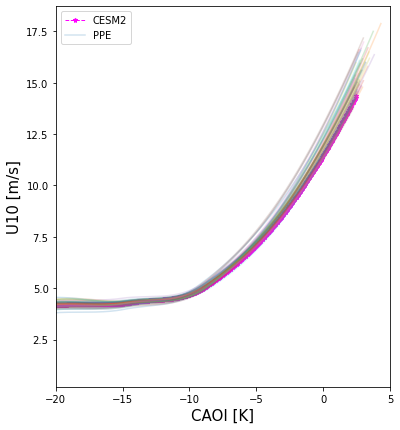

In [47]:
fig= plt.figure(figsize=(6, 7))
plt.plot(bin_means_x_gcm, bin_means_gcm,color='magenta' ,marker='*', linestyle='dashed',
     markersize=5,linewidth=1, label='CESM2') #marker='*', markersize=12,
# plt.plot(bin_means_x_obs, bin_means_obs,color='blue' ,marker='*', linestyle='dashed',
#      markersize=5,linewidth=1, label='Observations')
for en in enn:
    x = locals()['M_'+str(en)]
    y = locals()['U10_'+str(en)]
    ind = np.argsort(x)
    xx = np.sort(x)
    yy = y[ind]
    
    indx = np.isnan(xx*yy)==False
    
    bin_means, bin_edges, binnumber = stats.binned_statistic(xx[indx], yy[indx], 'mean', bins=1000)
    bin_means_x, bin_edges_x, binnumber_x = stats.binned_statistic(xx[indx], xx[indx], 'mean', bins=1000)
    
    index = np.isnan(bin_means_x*bin_means)==False
    
    # plt.plot(bin_means_x, bin_means)
    l = loess(bin_means_x[index], bin_means[index])
    l.fit()
    pred = l.predict(bin_means_x[index], stderror=True)
    conf = pred.confidence()

    lowess = pred.values
    
    
    if en==250:
        plt.plot(bin_means_x[index], lowess, alpha=0.2,label='PPE')
        
    else:
        plt.plot(bin_means_x[index], lowess, alpha=0.2)
    

# plt.plot(bin_means_x_obs, bin_means_obs, label='MACLWP+MERRA2')
# plt.plot(bin_means_x_gcm, bin_means_gcm, label='CESM2')
# plt.xticks(np.arange(-20,6,5),fontsize='12')
# plt.yticks(np.arange(4,13),fontsize='12')
plt.xlim([-20,5])

plt.legend()
plt.ylabel('U10 [m/s]',fontsize='15')
plt.xlabel('CAOI [K]',fontsize='15')
# plt.title('CAM6 PPE')
# plt.savefig('ppe.png')